# Offset synthetic by convolution

### Earth model

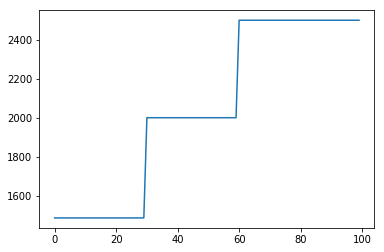

In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

vp = np.ones(100) * 1486
vp[30:] = 2000
vp[60:] = 2500

vs = np.ones_like(vp)
rho = np.ones_like(vp)

plt.plot(vp)

/home/matt/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


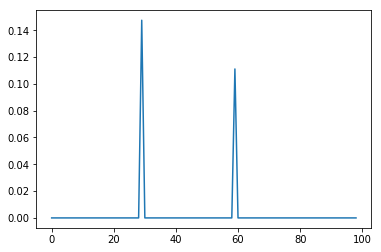

In [8]:
import bruges

rc = bruges.reflection.reflectivity(vp, vs, rho, theta=np.arange(30))

plt.plot(rc[0])

### Wavelet

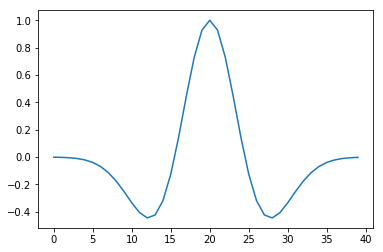

In [15]:
w = bruges.filters.ricker(0.04, 0.001, 50)

plt.plot(w)

### Convolution

In [19]:
def convolve_one_trace(tr):
    return np.convolve(tr, w, mode='same')

syn = np.apply_along_axis(convolve_one_trace, axis=1, arr=rc)

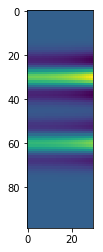

In [22]:
plt.imshow(syn.real.T)